# Trabalho 1 - Esteganofrafia
## Nícolas Hecker Silva, 186132

O primeiro passo para a execução do programa é carregar as bibliotecas que serão utilizadas (não se preocupe se elas não faz sentido agora, elas serão explicadas ao longo do notebook). Após isso, é necessário carregar uma imagem para ver se conseguimos visualizá-la.	

In [37]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Para carregar as imagens, usaremos a biblioteca OpenCV, que é uma biblioteca de visão computacional. Porém, para mostrar as imagens no notebook, usaremos a biblioteca matplotlib, uma vez que a biblioteca OpenCV não é capaz de mostrar imagens no notebook. Há também uma peculiaridade na forma como o OpenCV carrega as imagens, que é o fato de ele carregar no formato BGR, enquanto o matplotlib espera que as imagens estejam no formato RGB. Por isso, é necessário fazer a conversão de BGR para RGB antes de mostrar a imagem com matplotlib. No caso, para facilitar a compreensão, nesse notebook as imagens sempre serão carregadas e logo em seguida transformadas para o formato RGB.

A imagem baboon.png foi carregada com sucesso tem dimensões (512, 512, 3) e tipo uint8
Os 3 primeiros pixels da primeira linha são: 
[[164 150  71]
 [ 63  57  31]
 [ 75  43  10]]
Mostrando o pixel no nariz: 
[213 164 186]
Mostrando ela:


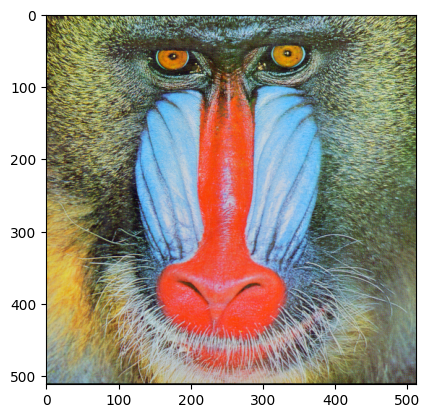

In [42]:
# Carrega a imagem baboon.png da pasta "imgs" como RGB e mostra o vetor numpy correspondente
baboom = cv2.imread('imgs/baboon.png')[:,:,::-1]
print(f"A imagem baboon.png foi carregada com sucesso tem dimensões {baboom.shape} e tipo {baboom.dtype}")
print(f"Os 3 primeiros pixels da primeira linha são: \n{baboom[0,0:3]}")
print(f"Mostrando o pixel no nariz: \n{baboom[200,250]}")
print("Mostrando ela:")

plt.imshow(baboom)
plt.show()


Acima podemos ver a imagem do baboom colorida. Foi plotado também eixos para indicar a posição dos pixels e lembrar que a imagem é uma matriz. Próximo a região 200,250 podemos ver o nariz vermelho do babuíno, e plotando o valor do pixel nessa região, podemos ver que o valor é [213 164 186], ou seja, 213 para vermelho, 164 para verde e 186 para azul. Como há muito mais vermelho que as outras cores, esse se trata de um pixel vermelho.

Podemos agora separar os canais de cores da imagem, para ver como cada um se comporta. Em cima temos os canais de cores em suas respectivas cores, enquanto embaixo temos os mesmos valores mas mostrados em escala de cinza. É criado 3 imagens e em cada um é zerado os valores dos outros canais, para que possamos ver como cada canal se comporta.

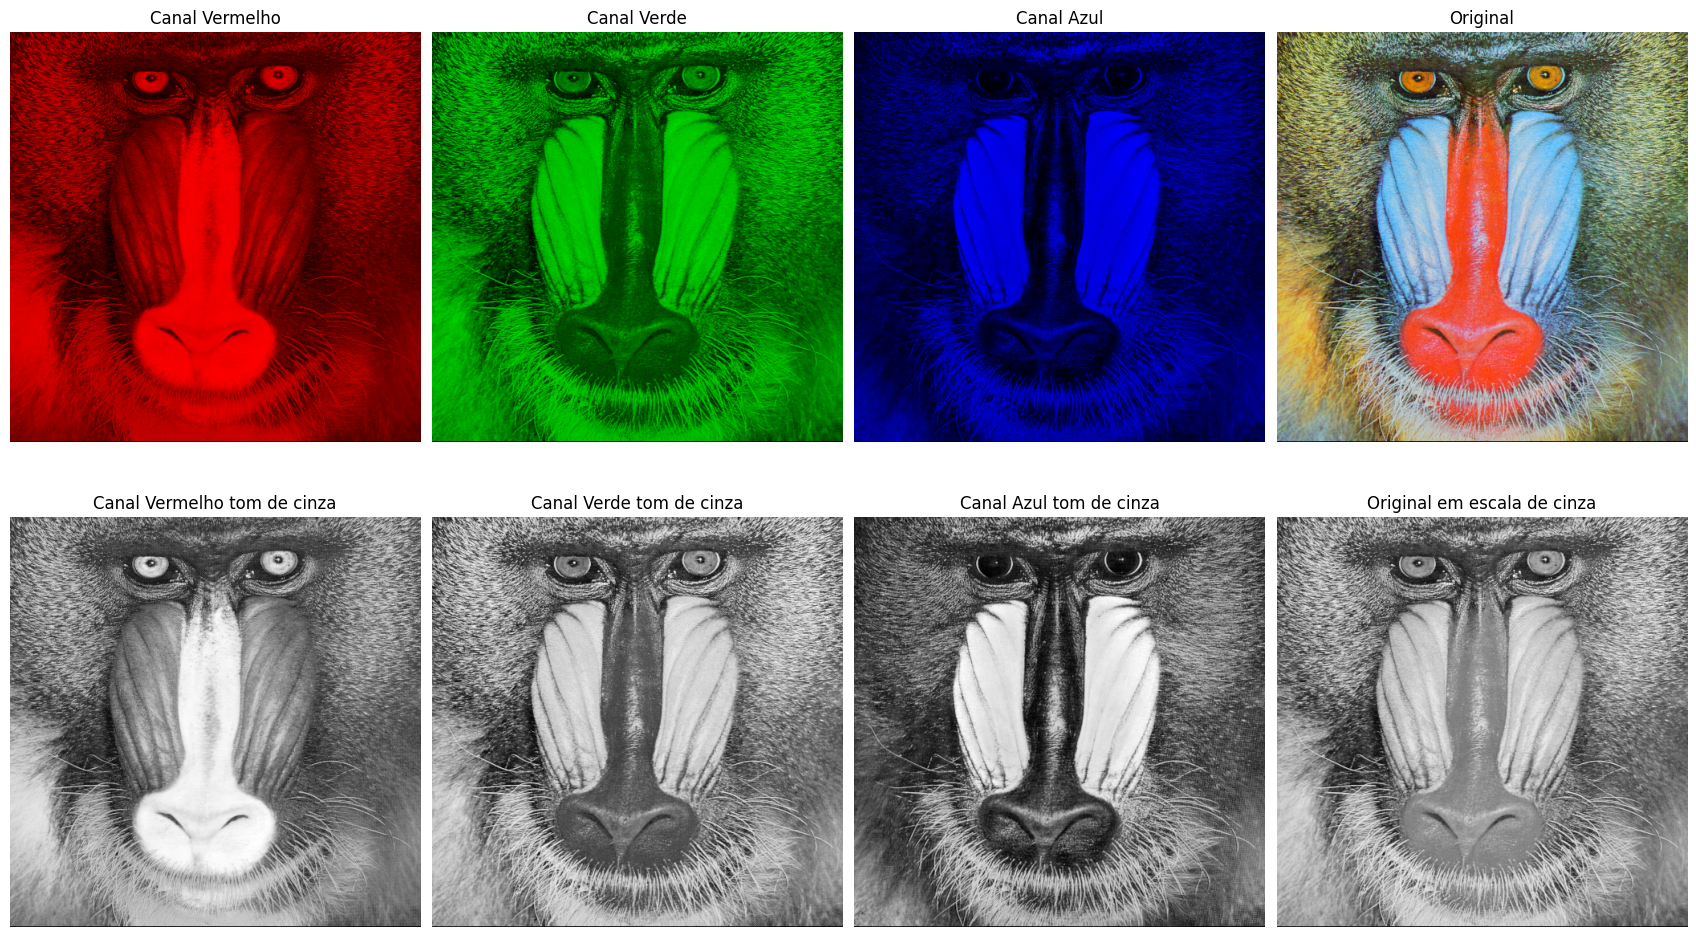

In [66]:
baboomRed = baboom.copy()
baboomRed[:,:,(1,2)] = 0
baboomVerde = baboom.copy()
baboomVerde[:,:,(0,2)] = 0
baboomAzul = baboom.copy()
baboomAzul[:,:,(0,1)] = 0
baboomCinza = cv2.cvtColor(baboom, cv2.COLOR_RGB2GRAY)


fig, axs = plt.subplots(2,4, figsize=(15,5))
axs[0][0].imshow(baboomRed)
axs[0][0].set_title("Canal Vermelho")
axs[0][1].imshow(baboomVerde)
axs[0][1].set_title("Canal Verde")
axs[0][2].imshow(baboomAzul)
axs[0][2].set_title("Canal Azul")
axs[1][0].imshow(baboomRed[:,:,0], cmap='gray')
axs[1][0].set_title("Canal Vermelho tom de cinza")
axs[1][1].imshow(baboomVerde[:,:,1], cmap='gray')
axs[1][1].set_title("Canal Verde tom de cinza")
axs[1][2].imshow(baboomAzul[:,:,2], cmap='gray')
axs[1][2].set_title("Canal Azul tom de cinza")
axs[0][3].imshow(baboom)
axs[0][3].set_title("Original")
axs[1][3].imshow(baboomCinza, cmap='gray')
axs[1][3].set_title("Original em escala de cinza")

#remove eixos
for ax in axs.flatten():
    ax.axis('off')

# aumenta a distancia vertical
plt.tight_layout()
# seta o tamanho do plot para 1000x1000
fig.set_size_inches(18, 10)
plt.show()

É interessante notar que os pontos mais fortes (brancos na imagem em tons de cinza) do canal vermelho estão no nariz e um pouco na barba, uma vez que o nariz é muito vermelho e a barba é amarela, que é uma mistura de vermelho e verde. Já o canal verde tem pontos fortes em quase toda a imagem com excessão do nariz e de regiões escuras do macaco. Isso acontece pois o nariz é uma cor vermelha mais pura, o preto não possui cores, e o restante do macao é amarelo (mistura vermelho e verde), ciano (azul e verde) e branco (vermelho, verde e azul). Por fim, o canal azul tem pontos fortes nas laterais do nariz, pois elas são ciano, que é uma mistura de azul e verde e pouquíssimos no nariz que é muito vermelho. Nos pontos brancos como nos pelos sobre os lábios, todos os canais de cores estçao fortes, enquanto nos pontos pretos, todos os canais estão fracos.